In [2]:
!pip install tensorflow==2.0.0-beta1

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

2.0.0-beta1


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [4]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names=['Tshirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankleboot']

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

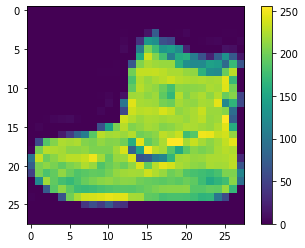

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images=train_images/255.0
test_images=test_images/255.0

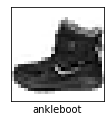

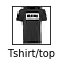

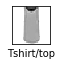

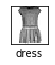

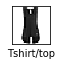

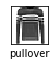

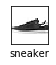

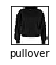

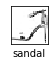

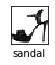

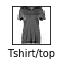

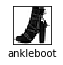

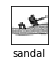

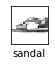

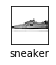

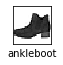

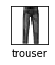

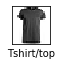

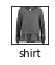

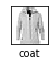

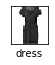

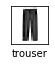

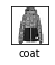

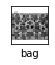

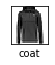

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  plt.show()

In [0]:
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28, 28)),
                        keras.layers.Dense(128, activation='relu'),
                        keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile( optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [26]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3735 - accuracy: 0.8648
Epoch 2/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3370 - accuracy: 0.8767
Epoch 3/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3117 - accuracy: 0.8860
Epoch 4/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2950 - accuracy: 0.8917
Epoch 5/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2787 - accuracy: 0.8972
Epoch 6/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2675 - accuracy: 0.9018
Epoch 7/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2585 - accuracy: 0.9041
Epoch 8/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2463 - accuracy: 0.9089
Epoch 9/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2397 - accuracy: 0.9104
Epoch 10/10
60

In [27]:
test_loss, test_accuracy=model.evaluate(test_images, test_labels)
print(test_accuracy)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.3412 - accuracy: 0.8822
0.8822


In [0]:
predictions=model.predict(test_images)

In [29]:
predictions[0]

array([4.4643105e-07, 5.6414574e-11, 2.9149211e-08, 2.2468016e-10,
       2.4295332e-07, 7.8228274e-03, 3.9047754e-06, 1.9678883e-03,
       4.6370420e-07, 9.9020422e-01], dtype=float32)

In [30]:
np.argmax(predictions[0])

9

In [31]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

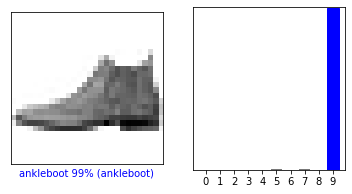

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

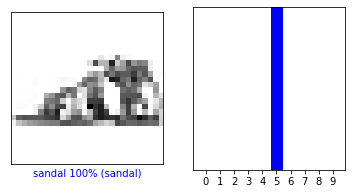

In [35]:
i = 11
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

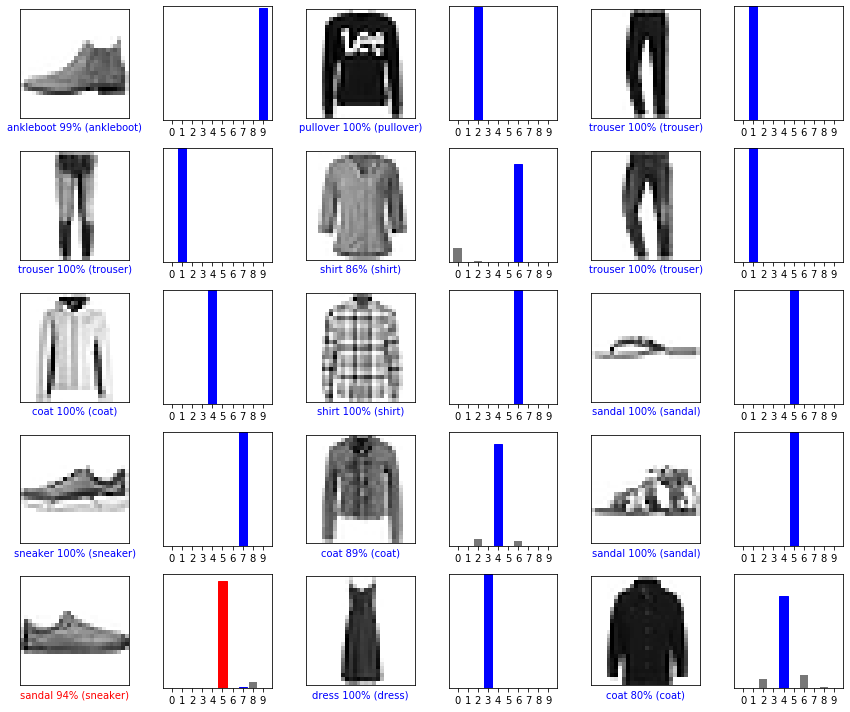

In [36]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [37]:
img = test_images[1]

print(img.shape)

(28, 28)


In [38]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [40]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.1706385e-04 2.5104387e-13 9.9565744e-01 3.2104516e-10 1.5035031e-03
  6.2431359e-11 2.5219531e-03 7.6236069e-17 6.0005684e-10 8.8203298e-16]]


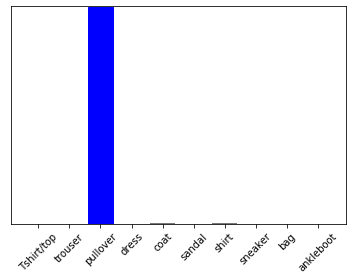

In [46]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [47]:
np.argmax(predictions_single[0])

2